In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv("/content/diabetes.csv")

In [6]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [10]:
dataframe.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1




*   Data Imputation of 0's in every feature.
*   Size of the data



In [12]:
dataframe.shape

(768, 9)



*   Target column : Outcome[0,1] (Binary Classification Task).
*   As the target column is available in dataset, so it is supervised machine learning algorithm.



In [13]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


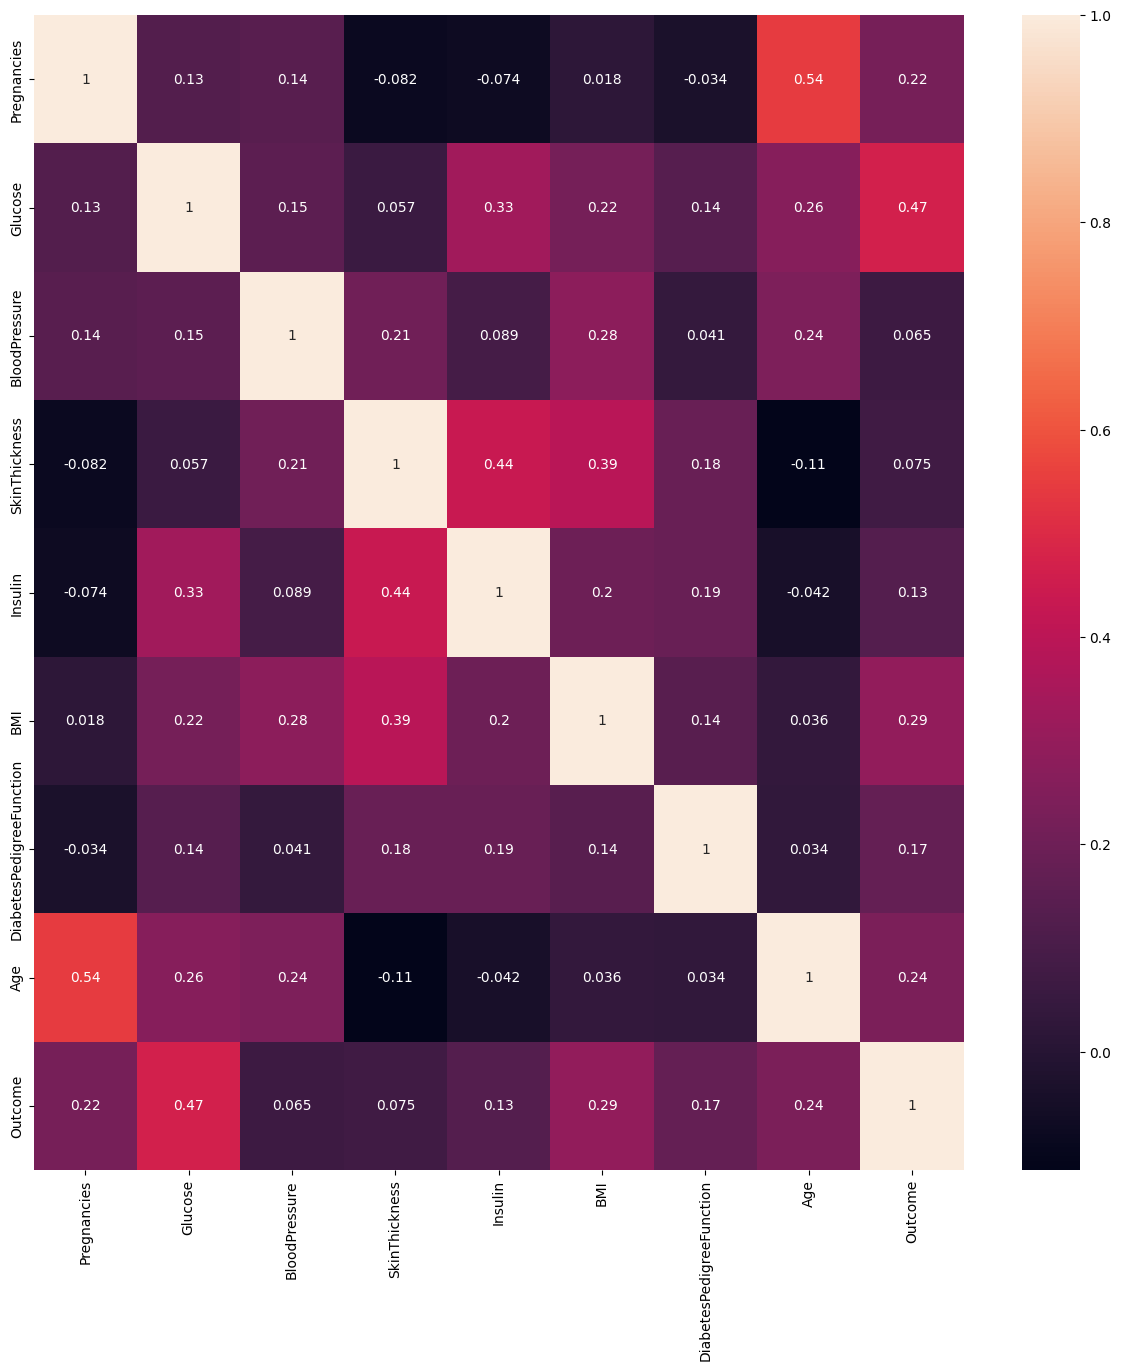

In [15]:
plt.figure(figsize = (15, 15))
ax = sns.heatmap(dataframe.corr(), annot = True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

Descriptive statistics of given data

In [16]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation

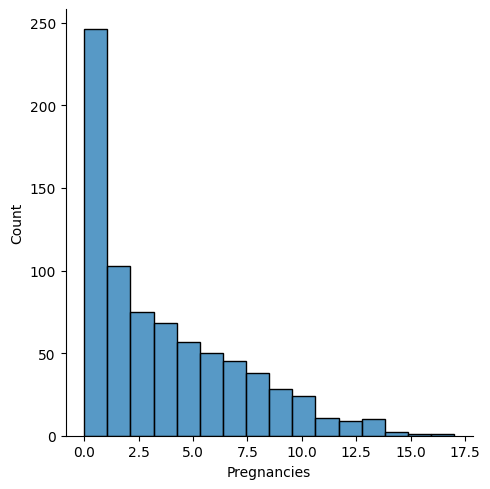

In [18]:
sns.displot(dataframe["Pregnancies"])

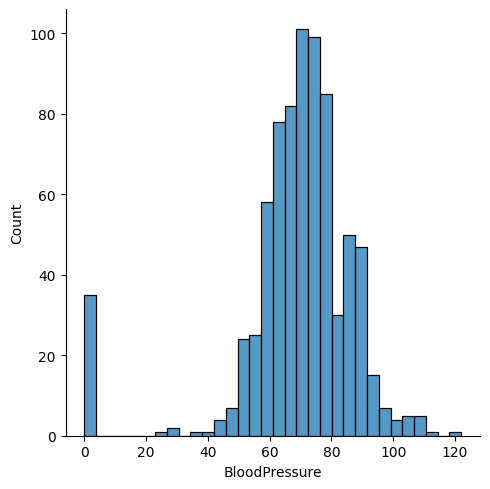

In [19]:
sns.displot(dataframe["BloodPressure"])

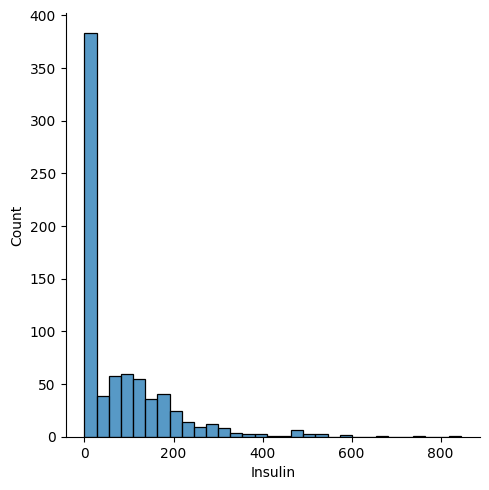

In [20]:
sns.displot(dataframe["Insulin"])

In [25]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

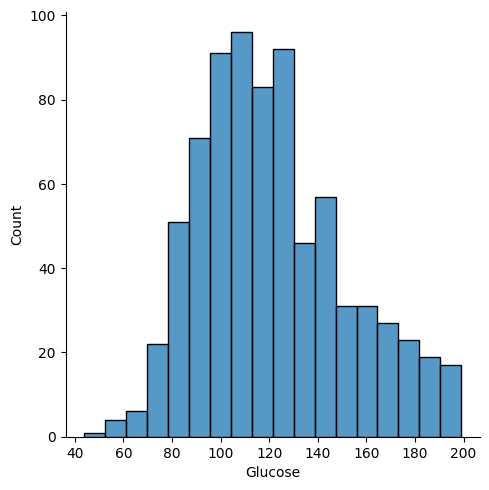

In [28]:
sns.displot(dataframe["Glucose"])

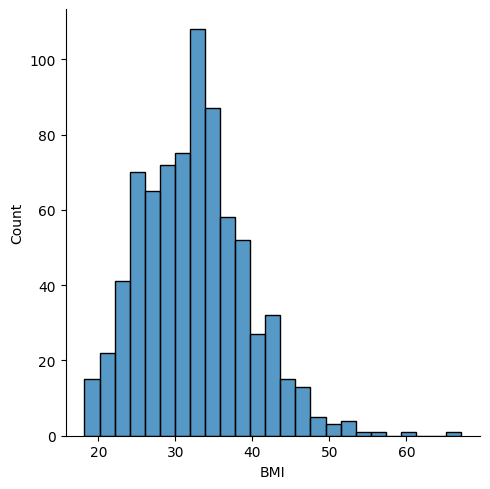

In [29]:
sns.displot(dataframe["BMI"])

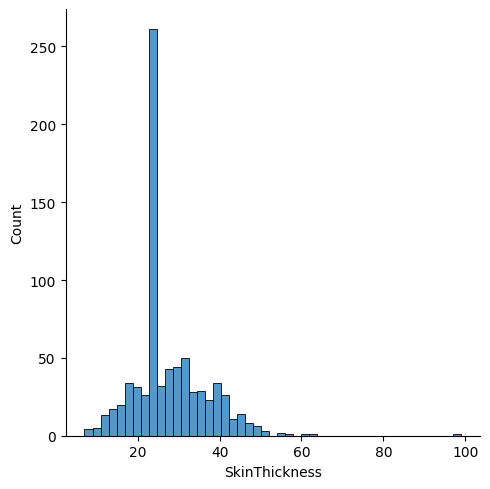

In [30]:
sns.displot(dataframe["SkinThickness"])

In [31]:
# Repllacing 0's in insulin column

dataframe['Insulin'] = dataframe['Insulin'].replace(0, dataframe['Insulin'].median())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, dataframe['BloodPressure'].mean())
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0, dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0, dataframe['Glucose'].median())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0, dataframe['SkinThickness'].median())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0, dataframe['DiabetesPedigreeFunction'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0, dataframe['BMI'].mean())
dataframe['Age'] = dataframe['Age'].replace(0, dataframe['Age'].median())

In [32]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


As of now what we done is


*   Descriptive statistics and it's significance.
*   Correlation coffecient and its significance.
*  types of distribution and its significance
*  median is more robuts to outliers and why



##Outlier detection

boxplot


In [34]:
# x --> input value , y --> target value

x = dataframe.drop(columns = 'Outcome', axis = 1)
y = dataframe['Outcome']

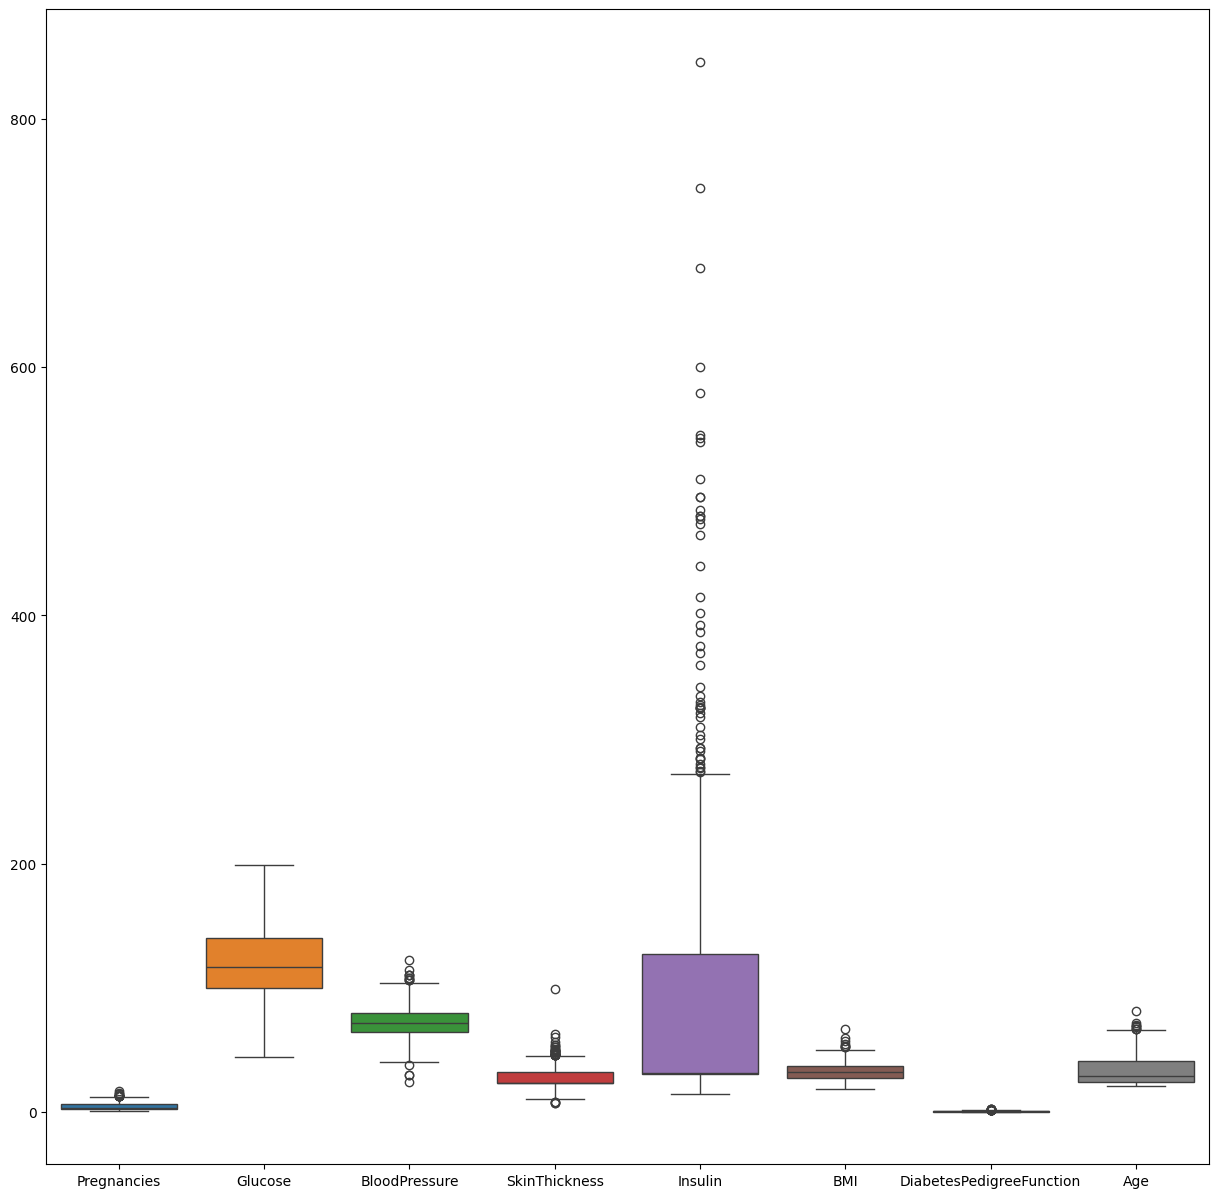

In [35]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = x, ax=ax)
plt.savefig('boxPlot.jpg')

In [39]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols:
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (x[col] >= lower_bound) & (x[col] <= upper_bound)

In [40]:
x_outlier_detection = x[mask]
y_outlier_detection = y[mask]

In [41]:
x_outlier_detection.shape

(752, 8)

In [42]:
y_outlier_detection.shape

(752,)

##Standerdization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
x_scaled

array([[ 0.57322173,  0.87086448, -0.02770048, ...,  0.1608867 ,
         0.46879263,  1.54828125],
       [-1.0797999 , -1.20563531, -0.52239853, ..., -0.8581775 ,
        -0.36177415, -0.16252742],
       [ 1.23443039,  2.02447547, -0.68729787, ..., -1.33859349,
         0.60421113, -0.07248486],
       ...,
       [ 0.2426174 , -0.019064  , -0.02770048, ..., -0.91640974,
        -0.68075995, -0.25256998],
       [-1.0797999 ,  0.14573757, -1.01709657, ..., -0.3486454 ,
        -0.36779275,  1.27815356],
       [-1.0797999 , -0.94195279, -0.19259983, ..., -0.30497122,
        -0.47010895, -0.88286791]])

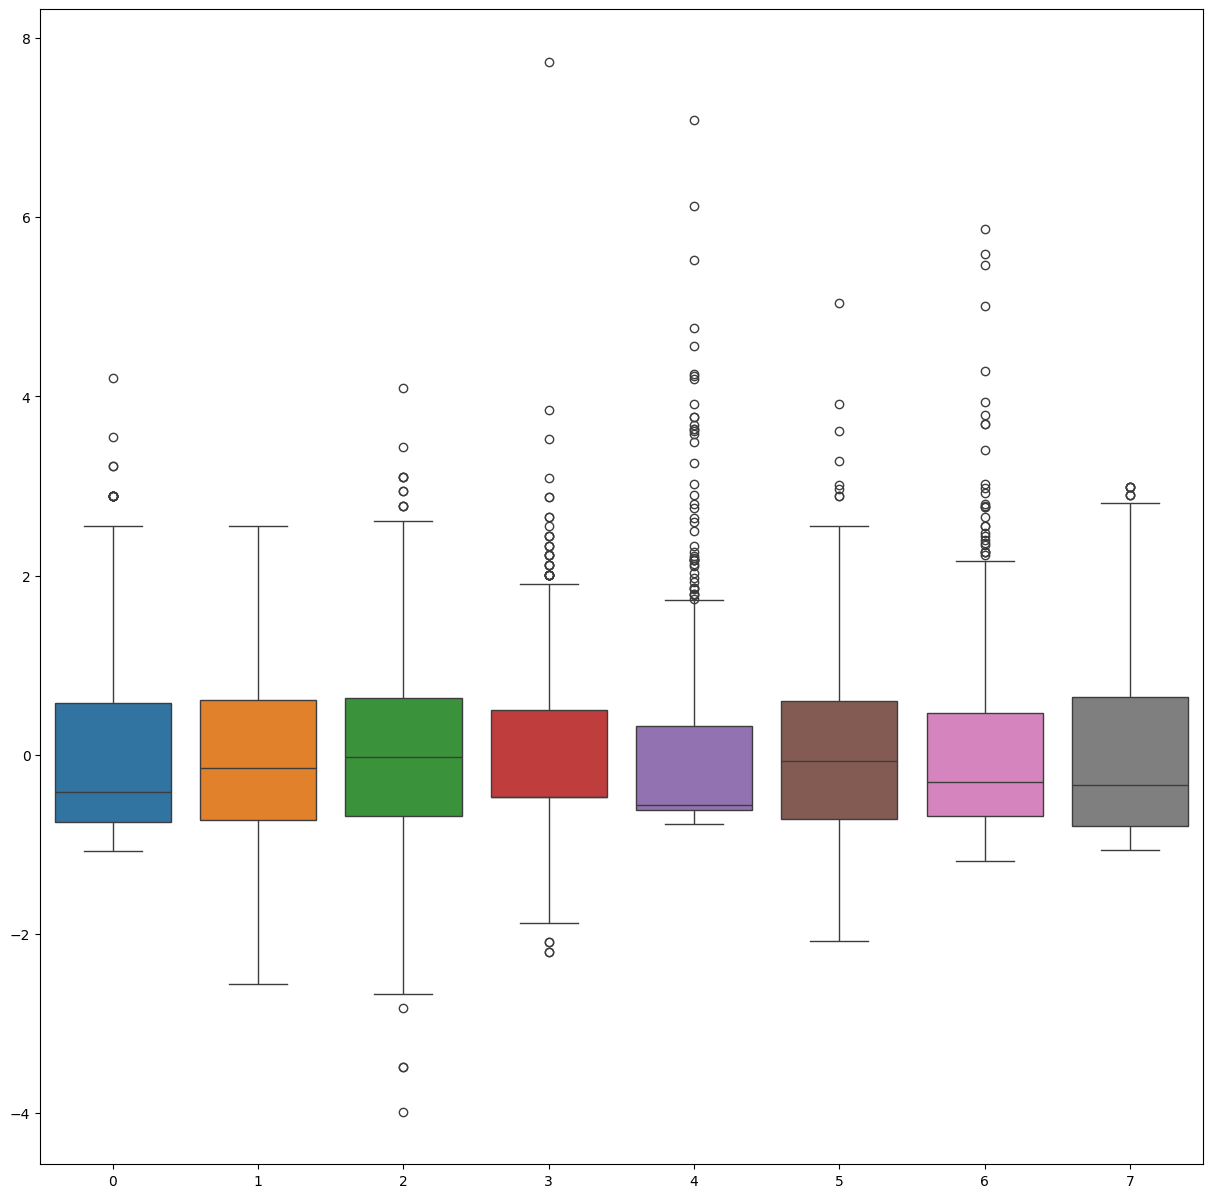

In [61]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = x_scaled, ax = ax)
plt.savefig('boxPlot.jpg')

In [55]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [62]:
type(x_scaled)

numpy.ndarray

In [63]:
x_scaled = pd.DataFrame(x_scaled, columns = cols)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,3.276548e-17,9.361564e-18,-2.223372e-17,1.170196e-18,-2.457411e-17,-1.638274e-17,2.574430e-17,1.638274e-17
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.557008e+00,-3.985285e+00,-2.200901e+00,-7.684941e-01,-2.081055e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.277108e-01,-6.872979e-01,-4.729631e-01,-6.126688e-01,-7.125969e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.509053e-01,-2.770048e-02,-4.729631e-01,-5.607270e-01,-7.204226e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.071820e-01,6.318969e-01,4.990017e-01,3.222827e-01,5.976285e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551840e+00,4.094783e+00,7.734740e+00,7.088876e+00,5.037837e+00,5.864467e+00,2.988962e+00


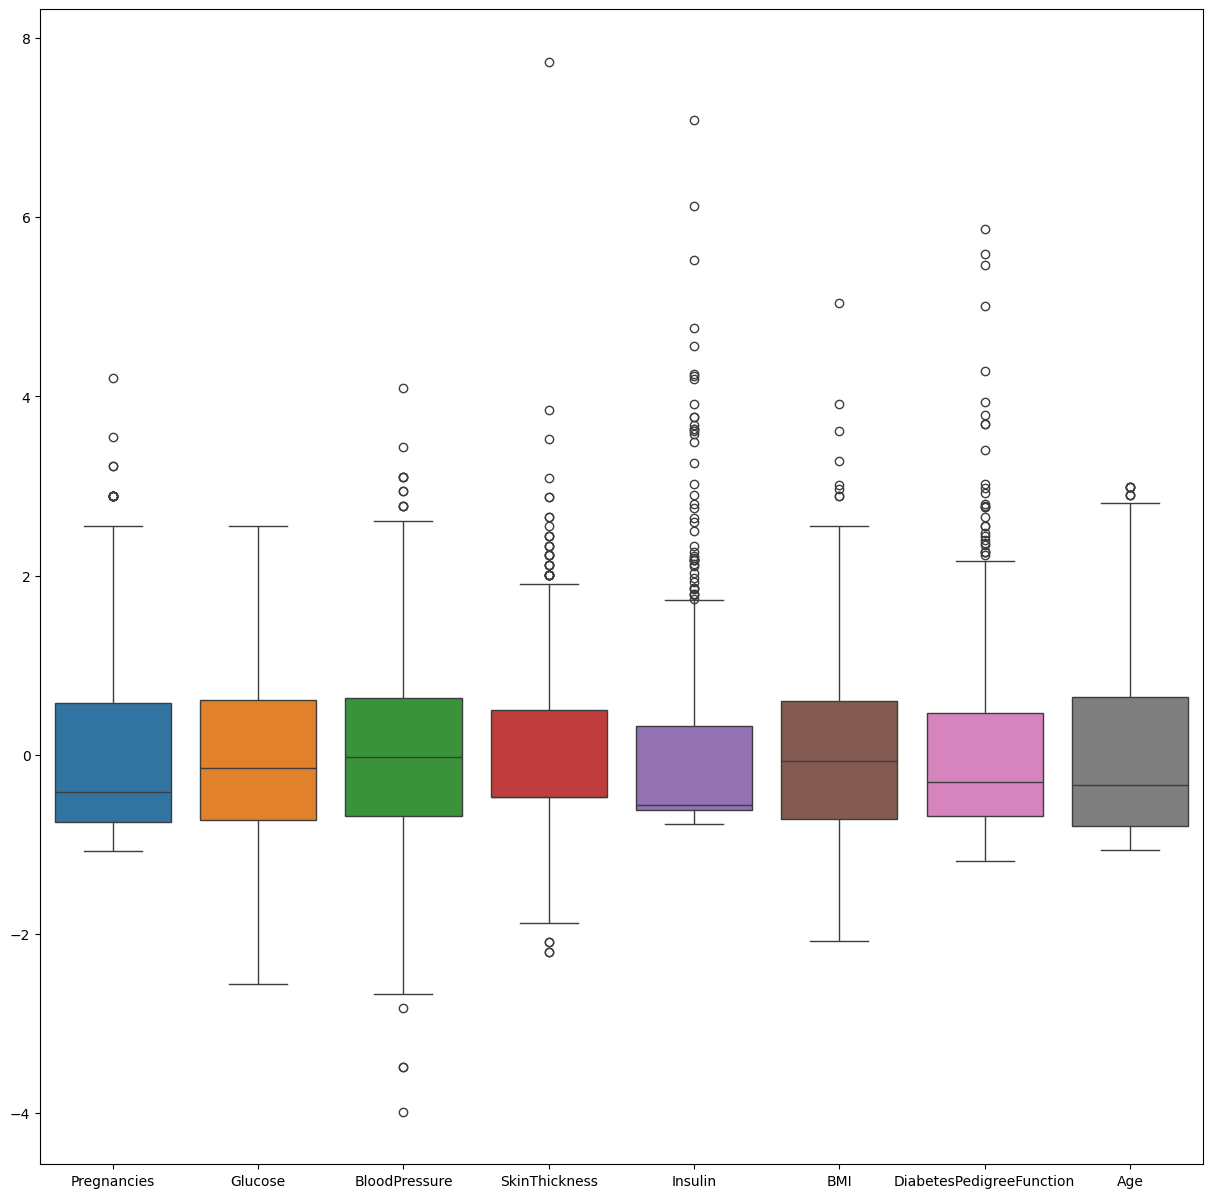

In [64]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = x_scaled, ax = ax)
plt.savefig('boxPlot.jpg')

In [49]:
y_outlier_detection.value_counts()

,count
Outcome,
0,488
1,264


In [66]:
x_scaled.shape

(759, 8)

In [67]:
q = x_scaled['Insulin'].quantile(.95)
dataNew = x_scaled[x_scaled['Insulin'] < q]

In [68]:
dataNew.shape

(721, 8)

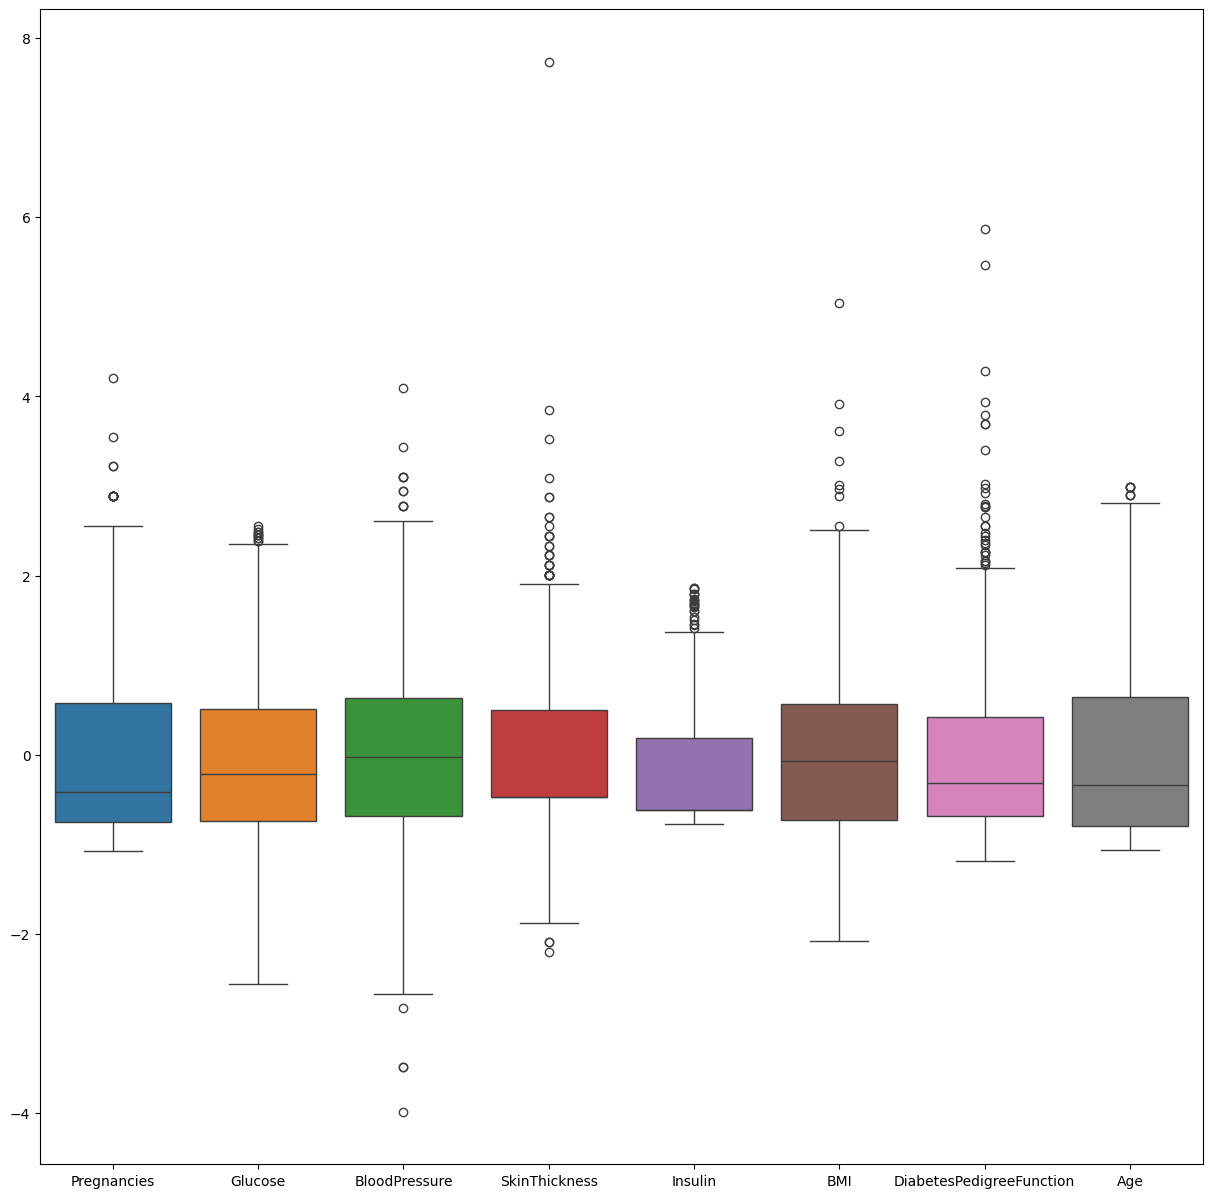

In [69]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = dataNew, ax = ax)
plt.savefig('boxPlot.jpg')

#Model Training

splitting of data into training and testing


In [74]:
# Remove the extra data
y_outlier_detection = y_outlier_detection[:721]


In [75]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)

In [76]:
x_train.shape

(483, 8)

In [77]:
x_test.shape

(238, 8)

In [78]:
y_train.value_counts()

,count
Outcome,
0,315
1,168


In [82]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Print resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())



Resampled class distribution:
Outcome
0    315
1    315
Name: count, dtype: int64


In [83]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression()

classification.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [84]:
#model predictions

y_predictions = classification.predict(x_test)
print(y_predictions)

[1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1]


In [85]:
# model evaluation

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predictions)

0.5084033613445378

In [86]:
from sklearn.metrics import classification_report

target_names = ['Non-Diabetic', 'Diabetic']

print(classification_report(y_test, y_predictions, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.66      0.50      0.57       155
    Diabetic       0.36      0.52      0.42        83

    accuracy                           0.51       238
   macro avg       0.51      0.51      0.50       238
weighted avg       0.56      0.51      0.52       238



In [88]:
import pickle

# Save the model to a file
with open("classification_model.pkl", "wb") as file:
    pickle.dump(classification, file)



In [90]:
classification_model = pickle.load(open("classification_model.pkl", "rb"))
classification_model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])